In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

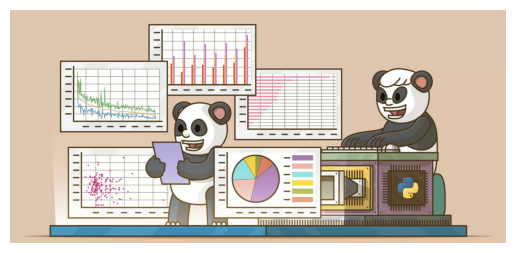

In [2]:
# Using Matplotlib to display saved image
pandas_image = mpimg.imread("pandas.png")
plt.imshow(pandas_image)
plt.axis("off")
plt.show()

## 2 Main datatypes (Series, Dataframe):

In [3]:
cars = pd.Series(["BMW", "Audi", "Mercedes", "Toyota"])
colors = pd.Series(["white", "blue", "red", "white"])
print(cars)
print("-------------")
print(colors)

0         BMW
1        Audi
2    Mercedes
3      Toyota
dtype: object
-------------
0    white
1     blue
2      red
3    white
dtype: object


#### Data Frames (made up of series'):

In [4]:
car_data = pd.DataFrame({"Car Model" : cars, "Color" : colors})
car_data


,Car Model,Color
0,BMW,white
1,Audi,blue
2,Mercedes,red
3,Toyota,white


### Importing and Exporting Data:

In [5]:
# use read_csv to create dataframe object with csv file
car_sales = pd.read_csv("car-sales.csv")

In [6]:
# print car_sales dataframe 
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,"$4,000.00"
1,Honda,Red,87899,4,"$5,000.00"
2,Toyota,Blue,32549,3,"$7,000.00"
3,BMW,Black,11179,5,"$22,000.00"
4,Nissan,White,213095,4,"$3,500.00"
5,Toyota,Green,99213,4,"$4,500.00"
6,Honda,Blue,45698,4,"$7,500.00"
7,Honda,Blue,54738,4,"$7,000.00"
8,Toyota,White,60000,4,"$6,250.00"
9,Nissan,White,31600,4,"$9,700.00"


In [7]:
# Exporting Data
car_sales.to_csv("exported-car-sales.csv", index=False)

## Describing Data:

In [8]:
# See Feature data-types
car_sales.dtypes

Make             object
Colour           object
Odometer (KM)     int64
Doors             int64
Price            object
dtype: object

## Cleaning Data:

In [9]:
# Converting price column from string to numeric value
# First convert Price series to string 
car_sales["Price"] = car_sales["Price"].astype(str)
# then use str replace method to clean up dollar signs, commas and decimals
car_sales["Price"] = car_sales["Price"].str.replace("$", "")
car_sales["Price"] = car_sales["Price"].str.replace(",", "")
car_sales["Price"] = car_sales["Price"].str.replace(".", "")
# then use to_numeric function to convert to numeric series
car_sales["Price"] = car_sales["Price"].astype(int)
# Divide values in price series by 100 to account for decimal 0's being added to price when decimal removed
car_sales["Price"] = car_sales["Price"] / 100

In [10]:
#all previous steps for converting in one line:
#car_sales["Price"] = car_sales["Price"].astype(str).str.replace("[\\$\\,\\.]", "", regex=True).astype(int)/100

In [11]:
# now the mean method will work on the price collumn as it has been cleaned and converted to numeric
car_sales.mean(numeric_only=True)

Odometer (KM)    78601.4
Doors                4.0
Price             7645.0
dtype: float64

In [12]:
# Cleaning String values by making all words lowercase:
car_sales["Colour"] = car_sales["Colour"].str.lower()
car_sales["Make"] = car_sales["Make"].str.lower()
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,toyota,white,150043,4,4000.0
1,honda,red,87899,4,5000.0
2,toyota,blue,32549,3,7000.0
3,bmw,black,11179,5,22000.0
4,nissan,white,213095,4,3500.0
5,toyota,green,99213,4,4500.0
6,honda,blue,45698,4,7500.0
7,honda,blue,54738,4,7000.0
8,toyota,white,60000,4,6250.0
9,nissan,white,31600,4,9700.0


In [13]:
# How to rename features (columns)
# Changing colour column to color:
car_sales = car_sales.rename(columns = {"Colour": "Color"})

## Getting Specific Data / Data-Info:

In [14]:
# General info about data with info method
car_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Make           10 non-null     object 
 1   Color          10 non-null     object 
 2   Odometer (KM)  10 non-null     int64  
 3   Doors          10 non-null     int64  
 4   Price          10 non-null     float64
dtypes: float64(1), int64(2), object(2)
memory usage: 532.0+ bytes


In [15]:
# Sum up a column in the data set
car_sales["Doors"].sum()

40

In [16]:
# get the length of the current dataframe (num rows)
len(car_sales)

10

In [17]:
# Query specific rows based on index by splicing
car_sales.iloc[3:5]

,Make,Color,Odometer (KM),Doors,Price
3,bmw,black,11179,5,22000.0
4,nissan,white,213095,4,3500.0


In [18]:
# Query Based on specific value
car_sales[car_sales["Make"] == "Toyota"]


,Make,Color,Odometer (KM),Doors,Price


In [19]:
# Only query cars with more than 75,000 miles:
car_sales[car_sales["Odometer (KM)"] > 75000]

,Make,Color,Odometer (KM),Doors,Price
0,toyota,white,150043,4,4000.0
1,honda,red,87899,4,5000.0
4,nissan,white,213095,4,3500.0
5,toyota,green,99213,4,4500.0


In [20]:
# Crosstabing to compare specific features
pd.crosstab(car_sales["Make"], car_sales["Color"])

Color,black,blue,green,red,white
Make,,,,,
bmw,1,0,0,0,0
honda,0,2,0,1,0
nissan,0,0,0,0,2
toyota,0,1,1,0,2


In [21]:
# Making a smaller dataframe using specific columns 
new_df = car_sales[["Color", "Price", "Doors"]]
new_df

,Color,Price,Doors
0,white,4000.0,4
1,red,5000.0,4
2,blue,7000.0,3
3,black,22000.0,5
4,white,3500.0,4
5,green,4500.0,4
6,blue,7500.0,4
7,blue,7000.0,4
8,white,6250.0,4
9,white,9700.0,4


In [22]:
# Combing Logic (|,&) (or, and)
new_df = car_sales[((car_sales["Make"] == "Toyota") | (car_sales["Make"] == "Nissan")) & (car_sales["Color"] == "White")]
new_df

,Make,Color,Odometer (KM),Doors,Price


In [23]:
# Looking for multiple values in the same column:
nissan_toyota = car_sales[car_sales["Make"].isin(["Toyota", "Nissan"])]
nissan_toyota

,Make,Color,Odometer (KM),Doors,Price


### using groupby method to find the averages of each car make for numeric values:

In [24]:
test = car_sales.groupby(["Make"]).mean(numeric_only=True)
test

,Odometer (KM),Doors,Price
Make,,,
bmw,11179.000000,5.00,22000.0
honda,62778.333333,4.00,6500.0
nissan,122347.500000,4.00,6600.0
toyota,85451.250000,3.75,5437.5


In [25]:
# lets try to only get the mean price for each color
test = car_sales.groupby(["Color"])["Price"].mean(numeric_only=True)
test

Color
black    22000.000000
blue      7166.666667
green     4500.000000
red       5000.000000
white     5862.500000
Name: Price, dtype: float64

### Working with missing data: 

In [27]:
car_sales_missing = pd.read_csv("car-sales-missing-data.csv")
car_sales_missing

,Make,Colour,Odometer,Doors,Price
0,Toyota,White,150043.0,4.0,"$4,000"
1,Honda,Red,87899.0,4.0,"$5,000"
2,Toyota,Blue,NaN,3.0,"$7,000"
3,BMW,Black,11179.0,5.0,"$22,000"
4,Nissan,White,213095.0,4.0,"$3,500"
5,Toyota,Green,NaN,4.0,"$4,500"
6,Honda,NaN,NaN,4.0,"$7,500"
7,Honda,Blue,NaN,4.0,NaN
8,Toyota,White,60000.0,NaN,NaN
9,NaN,White,31600.0,4.0,"$9,700"


In [28]:
# Checking Data type of odometer to make sure we don't need to clean data
car_sales_missing["Odometer"].dtype

dtype('float64')

In [29]:
# Replacing missing data in odometer column with average odometer value: 
car_sales_missing["Odometer"] = car_sales_missing["Odometer"].fillna(car_sales_missing["Odometer"].mean(numeric_only=True)).astype(int)
car_sales_missing

,Make,Colour,Odometer,Doors,Price
0,Toyota,White,150043,4.0,"$4,000"
1,Honda,Red,87899,4.0,"$5,000"
2,Toyota,Blue,92302,3.0,"$7,000"
3,BMW,Black,11179,5.0,"$22,000"
4,Nissan,White,213095,4.0,"$3,500"
5,Toyota,Green,92302,4.0,"$4,500"
6,Honda,NaN,92302,4.0,"$7,500"
7,Honda,Blue,92302,4.0,NaN
8,Toyota,White,60000,NaN,NaN
9,NaN,White,31600,4.0,"$9,700"


In [30]:
# Dropping rows with other NA values which we don't want to fill with averages:
car_sales_missing_dropped = car_sales_missing.dropna()
car_sales_missing_dropped
# Now lets look at our dataframe without rows containing NA values:

,Make,Colour,Odometer,Doors,Price
0,Toyota,White,150043,4.0,"$4,000"
1,Honda,Red,87899,4.0,"$5,000"
2,Toyota,Blue,92302,3.0,"$7,000"
3,BMW,Black,11179,5.0,"$22,000"
4,Nissan,White,213095,4.0,"$3,500"
5,Toyota,Green,92302,4.0,"$4,500"


### Creating and Removing Features:

In [31]:
# Creating a new column (Ready For Sale) and assigning value true to all cars
car_sales["Ready For Sale"] = True
car_sales

,Make,Color,Odometer (KM),Doors,Price,Ready For Sale
0,toyota,white,150043,4,4000.0,True
1,honda,red,87899,4,5000.0,True
2,toyota,blue,32549,3,7000.0,True
3,bmw,black,11179,5,22000.0,True
4,nissan,white,213095,4,3500.0,True
5,toyota,green,99213,4,4500.0,True
6,honda,blue,45698,4,7500.0,True
7,honda,blue,54738,4,7000.0,True
8,toyota,white,60000,4,6250.0,True
9,nissan,white,31600,4,9700.0,True


In [32]:
# When removing a column we must specify axis 1
# Dropping column Ready For Sale from Axis 1 (Columns)
car_sales = car_sales.drop("Ready For Sale", axis=1)
car_sales

,Make,Color,Odometer (KM),Doors,Price
0,toyota,white,150043,4,4000.0
1,honda,red,87899,4,5000.0
2,toyota,blue,32549,3,7000.0
3,bmw,black,11179,5,22000.0
4,nissan,white,213095,4,3500.0
5,toyota,green,99213,4,4500.0
6,honda,blue,45698,4,7500.0
7,honda,blue,54738,4,7000.0
8,toyota,white,60000,4,6250.0
9,nissan,white,31600,4,9700.0


In [33]:
# Using Functions on data with apply method (example with lambda function converting KM to Miles)
car_sales["Odometer (Miles)"] = car_sales["Odometer (KM)"].apply(lambda x: x * 0.621371).astype(int)
# Lambda function takes each value in Odometer (KM) multiplying it by a rate to get the value in miles and assigning it to new column 
car_sales

,Make,Color,Odometer (KM),Doors,Price,Odometer (Miles)
0,toyota,white,150043,4,4000.0,93232
1,honda,red,87899,4,5000.0,54617
2,toyota,blue,32549,3,7000.0,20225
3,bmw,black,11179,5,22000.0,6946
4,nissan,white,213095,4,3500.0,132411
5,toyota,green,99213,4,4500.0,61648
6,honda,blue,45698,4,7500.0,28395
7,honda,blue,54738,4,7000.0,34012
8,toyota,white,60000,4,6250.0,37282
9,nissan,white,31600,4,9700.0,19635


### Getting a random sample of data: 

In [34]:
# use sample method to get a random portion of the dataframe, then use frac parameter to determine percentage
test_sample = car_sales.sample(frac=0.25)
# Assigning random sample of 25% of car_sales data-frame to test_sample
test_sample

,Make,Color,Odometer (KM),Doors,Price,Odometer (Miles)
7,honda,blue,54738,4,7000.0,34012
0,toyota,white,150043,4,4000.0,93232


In [35]:
# we can also use sample to shuffle all of our data by setting frac to 1
car_sales_shuffled = car_sales.sample(frac=1)
# Notice how the indexes remain assigned to their original cars
car_sales_shuffled

,Make,Color,Odometer (KM),Doors,Price,Odometer (Miles)
6,honda,blue,45698,4,7500.0,28395
4,nissan,white,213095,4,3500.0,132411
1,honda,red,87899,4,5000.0,54617
8,toyota,white,60000,4,6250.0,37282
2,toyota,blue,32549,3,7000.0,20225
5,toyota,green,99213,4,4500.0,61648
3,bmw,black,11179,5,22000.0,6946
7,honda,blue,54738,4,7000.0,34012
9,nissan,white,31600,4,9700.0,19635
0,toyota,white,150043,4,4000.0,93232


In [36]:
# to reset the index use reset_index method (set drop to True or else old indexes will also remain)
car_sales_shuffled = car_sales_shuffled.reset_index(drop=True)
car_sales_shuffled

,Make,Color,Odometer (KM),Doors,Price,Odometer (Miles)
0,honda,blue,45698,4,7500.0,28395
1,nissan,white,213095,4,3500.0,132411
2,honda,red,87899,4,5000.0,54617
3,toyota,white,60000,4,6250.0,37282
4,toyota,blue,32549,3,7000.0,20225
5,toyota,green,99213,4,4500.0,61648
6,bmw,black,11179,5,22000.0,6946
7,honda,blue,54738,4,7000.0,34012
8,nissan,white,31600,4,9700.0,19635
9,toyota,white,150043,4,4000.0,93232
